In [1]:
from IPython.display import display, Markdown
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import seaborn as sns
import warnings
import textwrap
import time
import sys
import os
import io
import base64
from io import BytesIO

In [2]:
# Set float format for display (e.g., 2 decimal places)
pd.options.display.float_format = '{:.2f}'.format

# Suppress only the specific FutureWarning from pandas
warnings.filterwarnings("ignore")

In [3]:
#using DataCleaning Module

sys.path.append('/kaggle/input/modules/pyfiles/')
from datacleaning import DataCleaning

In [4]:
data = pd.read_csv("/kaggle/input/london-house-price-prediction-advanced-techniques/train.csv")

# Use the class
cleaner = DataCleaning(data)
cleaner.show_info()
cleaner.drop_duplicates()
cleaner.fill_missing(strategy='median', columns=['bathrooms', 'bedrooms', 'livingRooms', 'floorAreaSqM'])
cleaner.fill_missing(strategy='mode', columns=['tenure', 'propertyType', 'currentEnergyRating'])
#cleaner.remove_outliers(columns=['price','floorAreaSqM', 'bathrooms', 'bedrooms', 'livingRooms') 
cleaner.drop_duplicates()
cleaner.show_info()

# Get the cleaned data
df = cleaner.get_clean_data()
df["price"] = df["price"]*(10**-6)   
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_y

,ID,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,sale_month,sale_year,price
count,266325.00,266325.00,266325.00,266325.00,266325.00,266325.00,266325.00,266325.00,266325.00,266325.00
mean,133162.00,51.51,-0.10,1.36,2.45,98.87,1.25,6.81,2012.21,0.62
std,76881.55,0.06,0.09,0.67,1.13,55.07,0.55,3.36,9.14,1.27
min,0.00,51.39,-0.35,1.00,1.00,10.00,1.00,1.00,1995.00,0.01
25%,66581.00,51.47,-0.16,1.00,2.00,64.00,1.00,4.00,2004.00,0.22
50%,133162.00,51.51,-0.11,1.00,2.00,85.00,1.00,7.00,2014.00,0.39
75%,199743.00,51.55,-0.05,2.00,3.00,115.00,1.00,10.00,2021.00,0.65
max,266324.00,51.67,0.14,9.00,9.00,500.00,9.00,12.00,2023.00,100.00


In [5]:
questions = """
1. How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?  
2. Which years had the highest price variance (e.g., economic shocks)?  
3. Do prices in certain areas (`Borough`) lag/lead others in trends?  
4. Are there statistically significant spatial clusters (e.g., high-price zones in Kensington)?  
5. Does proximity to central London (e.g., Charing Cross) correlate with price?  
6. Do prices near borough boundaries differ significantly?  
7. Does `price / floorAreaSqM` reveal undervalued/overvalued properties?  
8. Does `bathrooms / bedrooms` impact price (luxury effect)?  
9. Do higher `currentEnergyRating` homes sell faster or at a premium?  
10. Are leasehold flats cheaper than freehold houses?  
11. Do rare `propertyType` (e.g., "mansion") have outlier prices?  
12. Do certain `outcode` prefixes (e.g., "SW1") command higher prices?  
13. Are there suspiciously low prices (e.g., right-to-buy sales)?  
14. Do homes with abnormally high `floorAreaSqM` but few rooms exist?  
15. Are there properties with mismatched `latitude/longitude` (e.g., outside London)?  
16. Does the price increase per bedroom vary by `outcode`?  
17. Do features like `floorAreaSqM` show diminishing returns on price?  
18. Does `propertyType × tenure` explain price better than either alone?  
19. Are recent sales (`sale_year=2023`) structurally different?  
20. Do prices correlate with external data (e.g., income by postcode)?
"""
display(Markdown(questions))


1. How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?  
2. Which years had the highest price variance (e.g., economic shocks)?  
3. Do prices in certain areas (`Borough`) lag/lead others in trends?  
4. Are there statistically significant spatial clusters (e.g., high-price zones in Kensington)?  
5. Does proximity to central London (e.g., Charing Cross) correlate with price?  
6. Do prices near borough boundaries differ significantly?  
7. Does `price / floorAreaSqM` reveal undervalued/overvalued properties?  
8. Does `bathrooms / bedrooms` impact price (luxury effect)?  
9. Do higher `currentEnergyRating` homes sell faster or at a premium?  
10. Are leasehold flats cheaper than freehold houses?  
11. Do rare `propertyType` (e.g., "mansion") have outlier prices?  
12. Do certain `outcode` prefixes (e.g., "SW1") command higher prices?  
13. Are there suspiciously low prices (e.g., right-to-buy sales)?  
14. Do homes with abnormally high `floorAreaSqM` but few rooms exist?  
15. Are there properties with mismatched `latitude/longitude` (e.g., outside London)?  
16. Does the price increase per bedroom vary by `outcode`?  
17. Do features like `floorAreaSqM` show diminishing returns on price?  
18. Does `propertyType × tenure` explain price better than either alone?  
19. Are recent sales (`sale_year=2023`) structurally different?  
20. Do prices correlate with external data (e.g., income by postcode)?


How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?

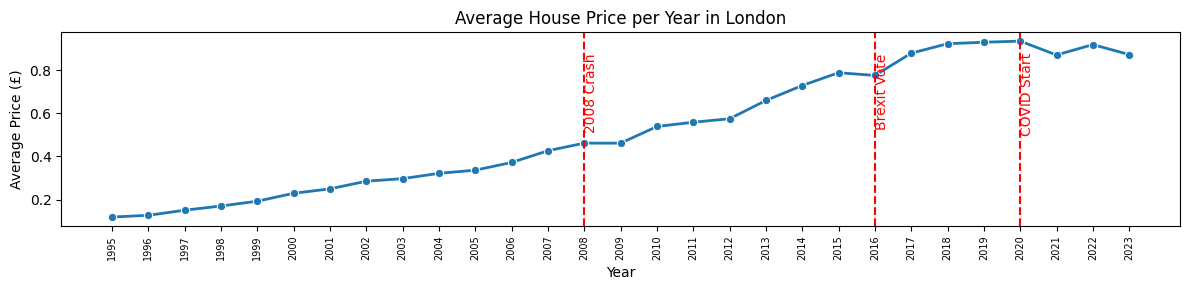

 
- The yearly trend reveals strong housing market recovery post-2008, a Brexit-induced plateau around 2016, 
  and a COVID dip in 2020 followed by a sharp rebound. 
- External economic and political events significantly influenced the London housing market.

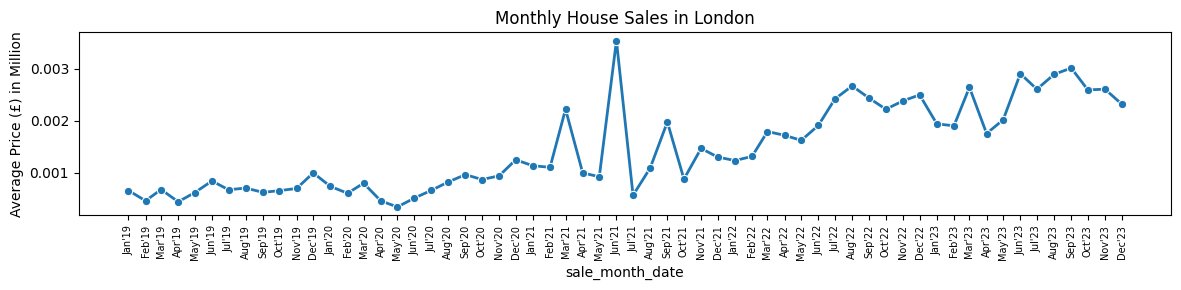

 
- Over the last 5 years, while seasonal peaks and troughs persist,
larger economic events—COVID, fiscal policy changes, and inflation—have caused significant year-over-year variations in price trends, especially around 2020–2022. 
- The market is showing signs of cooling or stabilizing in the most recent year.
- The spike in house sales in June 2021 and the subsequent drop in July 2021 were directly influenced by the timeline of the SDLT holiday. 
Buyers expedited transactions to benefit from the tax relief, leading to a temporary surge in the market, which then cooled as the incentive was withdrawn.

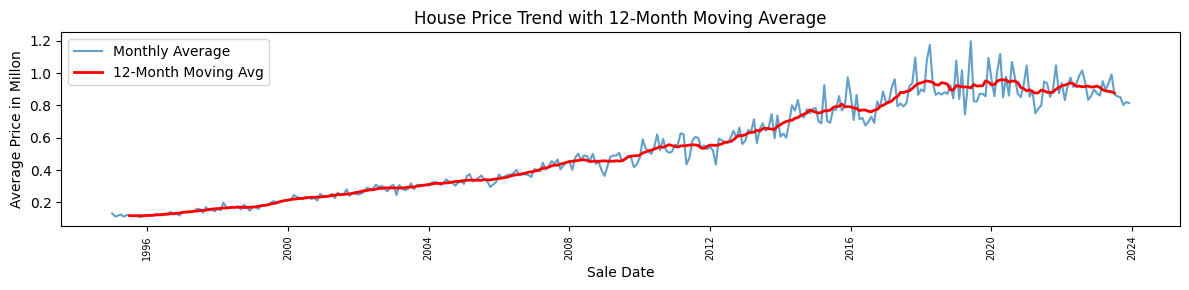

 
- Price is mostly concentrated between 0 and 10,000,000.

In [6]:
question = "How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?"
display(Markdown(question))

# Yearly average price
yearly_avg = df.groupby('sale_year')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 3))
sns.lineplot(data=yearly_avg, x='sale_year', y='price', marker='o', linewidth=2)
plt.title('Average House Price per Year in London', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.xticks(yearly_avg["sale_year"], rotation=90, ha='center', fontsize=7)
plt.grid(False)

# Highlight major events
important_years = {
    '2008 Crash': 2008,
    'Brexit Vote': 2016,
    'COVID Start': 2020
}

for label, year in important_years.items():
    plt.axvline(x=year, color='red', linestyle='--')
    plt.text(year, plt.ylim()[1]*0.90, label, rotation=90, verticalalignment='top', color='red')

plt.tight_layout()
plt.show()

display(Markdown(""" 
- The yearly trend reveals strong housing market recovery post-2008, a Brexit-induced plateau around 2016, 
  and a COVID dip in 2020 followed by a sharp rebound. 
- External economic and political events significantly influenced the London housing market."""))


# Monthly average across all years
graph_data_01 = df[["sale_month", "sale_year", "price"]]
graph_data_01["sale_month_date"] = pd.to_datetime(df['sale_year'].astype(str) + '-' + df['sale_month'].astype(str) + '-01')
graph_data_01["price"] = graph_data_01["price"] * (10**-6)
graph_data_01.groupby(by="sale_month_date")["price"].sum().reset_index()

graph_data_02 = graph_data_01.groupby(by="sale_month_date")["price"].sum().reset_index() 
graph_data_02 = graph_data_02[graph_data_02["sale_month_date"] >= "2019-01-01"]

# Plot
plt.figure(figsize=(12, 3))
sns.lineplot(data=graph_data_02, x='sale_month_date', y='price', marker='o', linewidth=2)
plt.title(f'Monthly House Sales in London', fontsize=12)
plt.xlabel('sale_month_date')
plt.ylabel('Average Price (£) in Million')
plt.xticks(graph_data_02["sale_month_date"], [date.strftime('%b\'%y') for date in graph_data_02["sale_month_date"]], rotation=90, ha='center', fontsize=7)
plt.grid(False)
plt.tight_layout()
plt.show()

display(Markdown(""" 
- Over the last 5 years, while seasonal peaks and troughs persist,
larger economic events—COVID, fiscal policy changes, and inflation—have caused significant year-over-year variations in price trends, especially around 2020–2022. 
- The market is showing signs of cooling or stabilizing in the most recent year.
- The spike in house sales in June 2021 and the subsequent drop in July 2021 were directly influenced by the timeline of the SDLT holiday. 
Buyers expedited transactions to benefit from the tax relief, leading to a temporary surge in the market, which then cooled as the incentive was withdrawn."""))


# Step 1: Create a sale_date column
df['sale_date'] = pd.to_datetime({
    'year': df['sale_year'],
    'month': df['sale_month'],
    'day': 1
})

# Step 2: Group by sale_date and calculate monthly average
monthly_avg = df.groupby('sale_date')['price'].mean().reset_index()

# Step 3: Calculate 12-month moving average
monthly_avg['moving_avg'] = monthly_avg['price'].rolling(window=12, center=True).mean()

# Step 4: Plot both original and moving average
plt.figure(figsize=(12, 3))
plt.plot(monthly_avg['sale_date'], monthly_avg['price'], label='Monthly Average', alpha=0.7)
plt.plot(monthly_avg['sale_date'], monthly_avg['moving_avg'], label='12-Month Moving Avg', linewidth=2, color="red")
plt.title("House Price Trend with 12-Month Moving Average", fontsize=12)
plt.xlabel("Sale Date")
plt.ylabel("Average Price in Millon")
plt.xticks(rotation=90, ha='center', fontsize=7)
plt.legend()
plt.tight_layout()
plt.show()


display(Markdown(""" 
- Price is mostly concentrated between 0 and 10,000,000."""))

Which years had the highest price variance (e.g., economic shocks)?

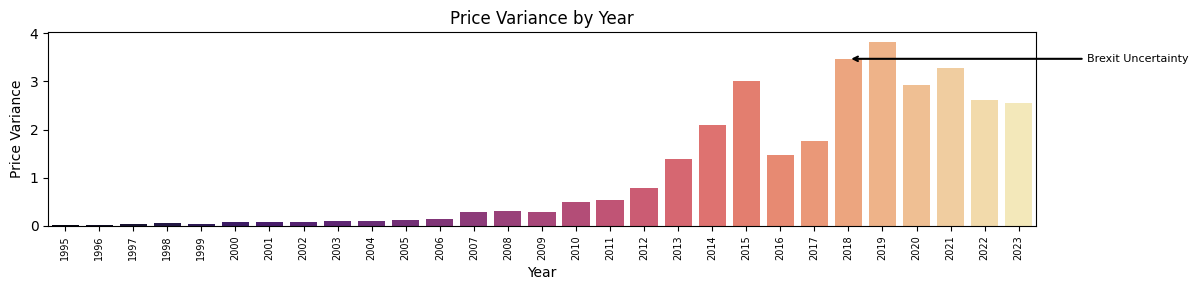

📌 Summary:
- 2018 to 2020 saw the highest house price variance in London.
- This period was marked by major economic and policy events:
    - Brexit uncertainty causing market hesitation.
    - COVID-19 pandemic leading to sudden demand and supply shifts.
    - Stamp Duty Holiday encouraging rapid buying in 2020.
- These external shocks caused sharp price swings, with 2018 being the most volatile year.
- Such high variance reflects strong economic influence on housing dynamics.

🔍 Modeling Implication:
- High variance makes house price prediction more complex and less stable.
- Use robust, non-linear models like:
    - XGBoost
    - Random Forest
- Add time-based features:
    - year, month
    - event/policy flags (e.g., "Stamp Duty Holiday")
- Apply log transformation on price to:
    - Reduce impact of outliers
    - Stabilize variance
    - Improve model performance and generalization

In [7]:
display(Markdown("Which years had the highest price variance (e.g., economic shocks)?"))

# Calculate variance or standard deviation per year
price_variance = df.groupby('sale_year')['price'].agg(['var', 'std']).reset_index()
price_variance = price_variance.sort_values(by='var', ascending=False)

# Plot
plt.figure(figsize=(12, 3))
sns.barplot(data=price_variance, x='sale_year', y='var', palette='magma')
plt.title("Price Variance by Year", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Price Variance")
plt.xticks(rotation=90, fontsize=7)

# Define special event years
event_years = {
    2018: "Brexit Uncertainty",
    2020: "COVID-19 & Stamp Duty",
    2021: "Post-COVID Surge"
}


plt.annotate(
    event_years[2018],                                   # Text (event label for that year)
    xy=(23, price_variance.loc[23, ["var"]][0]),         # Arrow points to the 'year' (x) and 'var' (y)
    xytext=(33, price_variance.loc[23, ["var"]][0]),     # Text placed slightly to the left of the point
    textcoords='data',                                   # Using data coordinates for placement
    ha='right', va='center',                             # Horizontal and vertical alignment
    fontsize=8, color='black',                           # Text style
    arrowprops=dict(arrowstyle="->", color='black', linewidth=1.5)  # Arrow properties
)

plt.annotate(
    event_years[2020],                                   # Text (event label for that year)
    xy=(25, price_variance.loc[25, ["var"]][0]-300000000000),         # Arrow points to the 'year' (x) and 'var' (y)
    xytext=(34, price_variance.loc[25, ["var"]][0]-300000000000),     # Text placed slightly to the left of the point
    textcoords='data',                                   # Using data coordinates for placement
    ha='right', va='center',                             # Horizontal and vertical alignment
    fontsize=8, color='black',                           # Text style
    arrowprops=dict(arrowstyle="->", color='black', linewidth=1.5)  # Arrow properties
)

plt.annotate(
    event_years[2021],                                   # Text (event label for that year)
    xy=(26, price_variance.loc[26, ["var"]][0]-300000000000),         # Arrow points to the 'year' (x) and 'var' (y)
    xytext=(34, price_variance.loc[26, ["var"]][0]-300000000000),     # Text placed slightly to the left of the point
    textcoords='data',                                   # Using data coordinates for placement
    ha='right', va='center',                             # Horizontal and vertical alignment
    fontsize=8, color='black',                           # Text style
    arrowprops=dict(arrowstyle="->", color='black', linewidth=1.5)  # Arrow properties
)
        


plt.tight_layout()
plt.show()


display(Markdown("""📌 Summary:
- 2018 to 2020 saw the highest house price variance in London.
- This period was marked by major economic and policy events:
    - Brexit uncertainty causing market hesitation.
    - COVID-19 pandemic leading to sudden demand and supply shifts.
    - Stamp Duty Holiday encouraging rapid buying in 2020.
- These external shocks caused sharp price swings, with 2018 being the most volatile year.
- Such high variance reflects strong economic influence on housing dynamics.

🔍 Modeling Implication:
- High variance makes house price prediction more complex and less stable.
- Use robust, non-linear models like:
    - XGBoost
    - Random Forest
- Add time-based features:
    - year, month
    - event/policy flags (e.g., "Stamp Duty Holiday")
- Apply log transformation on price to:
    - Reduce impact of outliers
    - Stabilize variance
    - Improve model performance and generalization"""))

Do prices in certain areas (Borough) lag/lead others in trends?


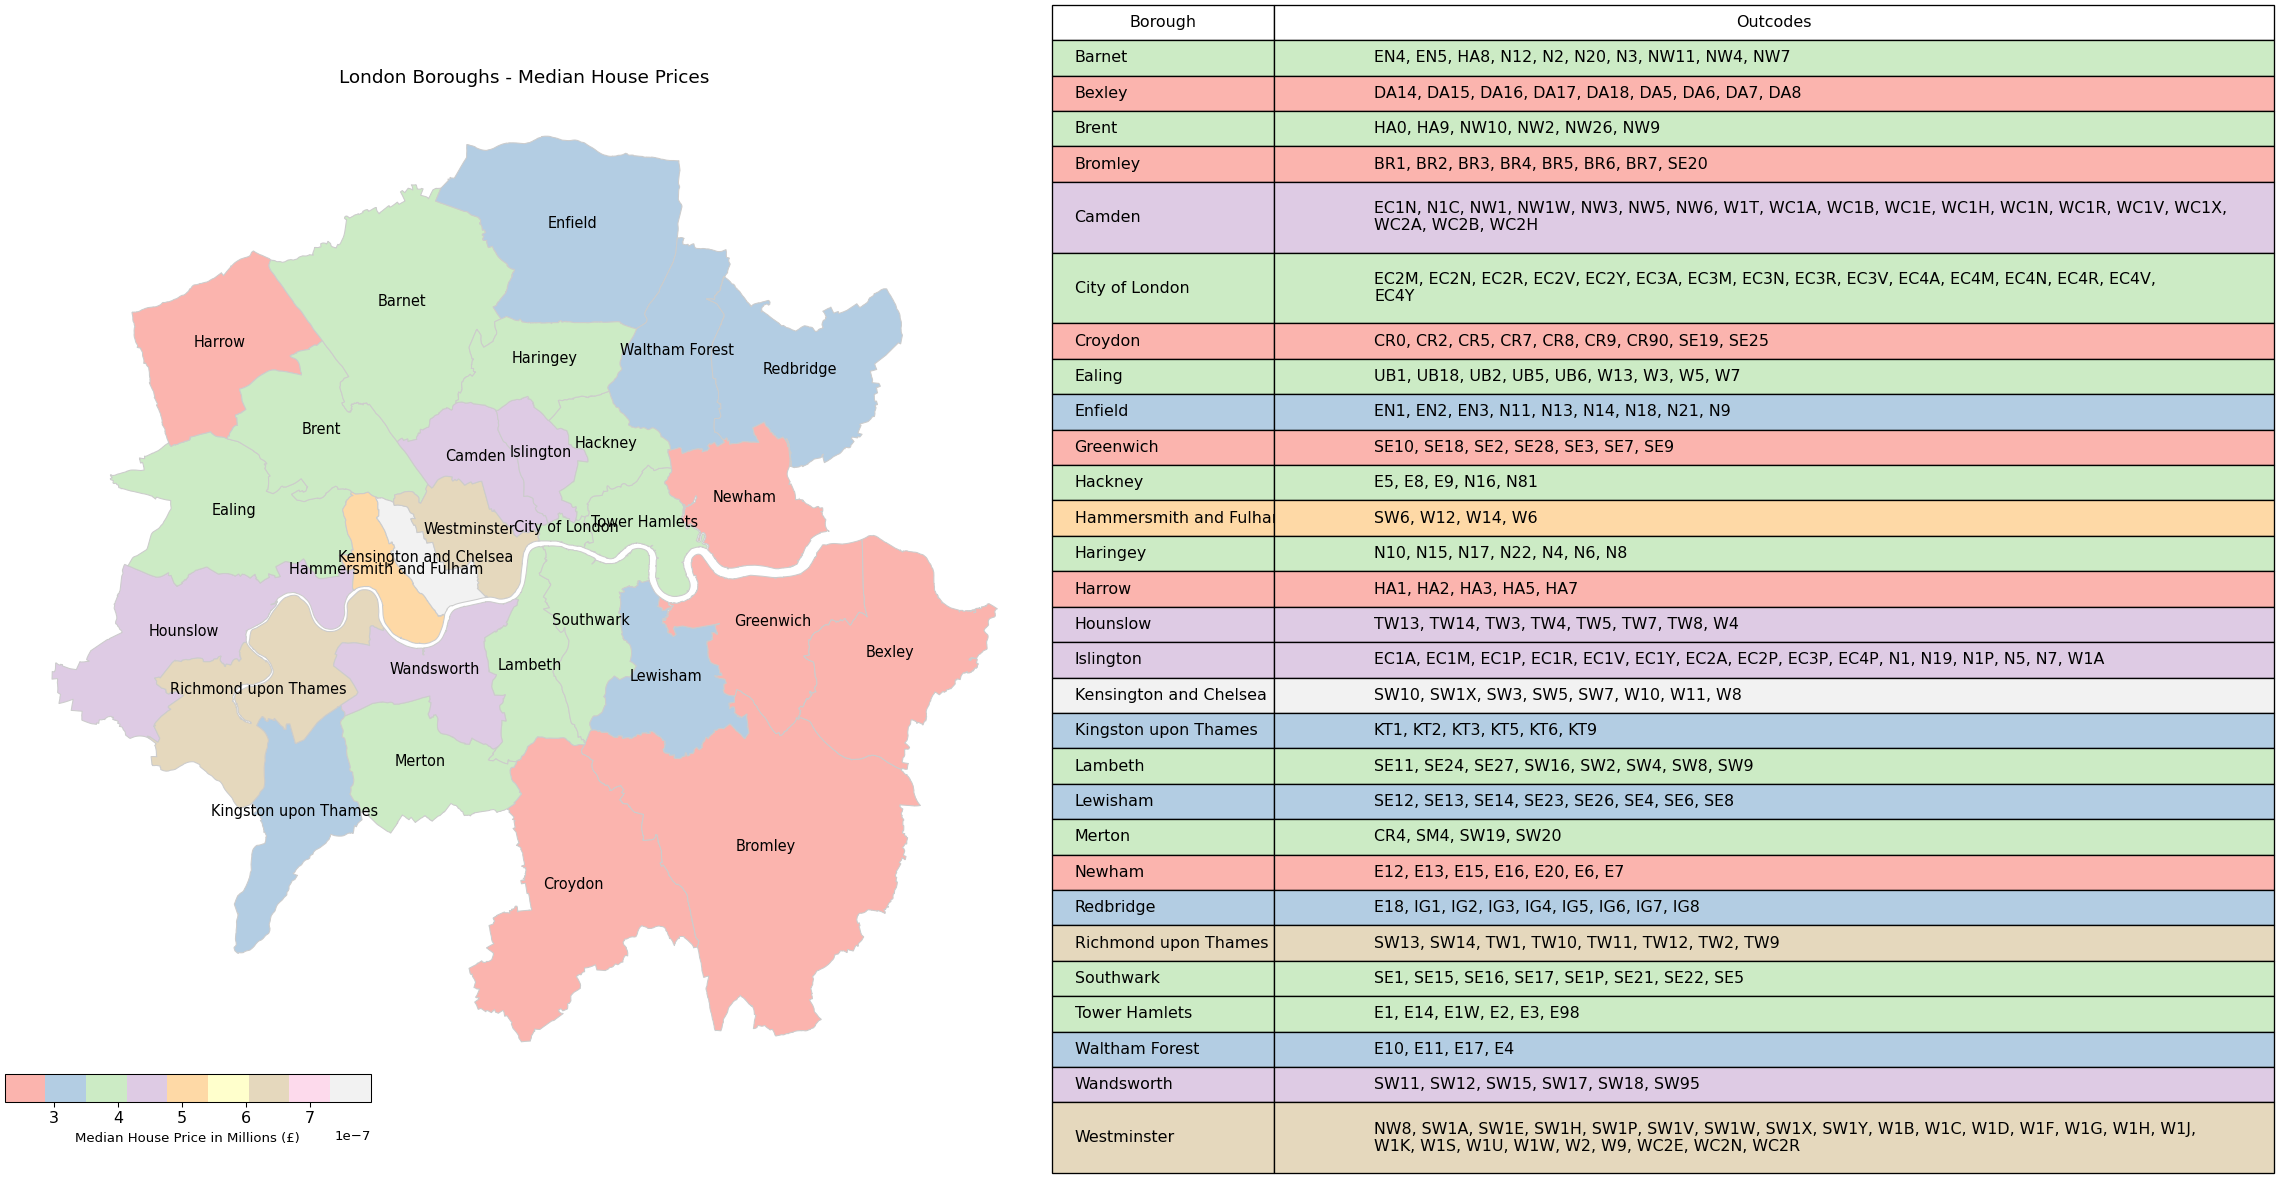

📌 Summary Insight: Price Trends Across Top Outcodes (Recent 5 Years)
- The scatter plot shows individual sale prices for the top 5 outcodes in London over the last 5 years.
- Areas like SW4 and SW2 exhibit higher price ranges, while SE9, SE6, and SE18 show relatively lower price clusters.
- The vertical spread (price variation) in each outcode is quite dense, but SW areas show higher ceilings, suggesting more high-end transactions.
- This pattern hints that some outcodes (like SW4/SW2) may lead price trends, being more sensitive to market movements, while SE areas may lag or remain more stable and affordable.

🔍 Modeling Implication:
- Price behavior varies significantly by outcode, suggesting geographic lag/lead effects.
- You should include outcode as a key categorical feature in modeling—possibly encoded using target encoding or embeddings (if using deep learning).
- Consider engineering trend features per outcode (e.g., year-wise average price growth) to model temporal shifts per location.
- Advanced models like Gradient Boosting (e.g., XGBoost) or LSTM + Tabular Hybrid models can help capture such area-based temporal dependencies.


In [8]:
display(Markdown("Do prices in certain areas (Borough) lag/lead others in trends?"))

# --- Load Data ---
# Load boroughs and house data
london_boroughs_data = gpd.read_file("/kaggle/input/londongeospatialdata/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
houses = gpd.GeoDataFrame(df, geometry=[Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])], crs="EPSG:4326")
houses['price'] = houses['price'] * (10**-6)

# Ensure same CRS
houses = houses.to_crs(epsg=4326)
london_boroughs_data = london_boroughs_data.to_crs(epsg=4326)

# --- Spatial Join: Assign each house to a borough ---
houses_with_borough = gpd.sjoin(houses, london_boroughs_data, how="inner", predicate="within")

# --- Calculate Median Price by Borough ---
borough_price = houses_with_borough.groupby('NAME').agg(avg_price=('price', 'median')).reset_index()

# --- Merge Borough Data with Price ---
london_boroughs_price = london_boroughs_data.merge(borough_price, on='NAME', how='left')

# --- Drop Boroughs with No Price Data ---
london_boroughs_price = london_boroughs_price.dropna(subset=['avg_price'])

# --- Load Postcode Data ---
postcodes_df = pd.read_csv("/kaggle/input/london-postcode-outcode/london-postcode-outcodes.csv")
postcode_points = gpd.GeoDataFrame(postcodes_df, geometry=[Point(lon, lat) for lon, lat in zip(postcodes_df['longitude'], postcodes_df['latitude'])], crs="EPSG:4326")

# --- Buffer Postcodes with 500m Radius ---
postcode_buffers_27700 = postcode_points.to_crs(epsg=27700)
postcode_buffers_27700['geometry'] = postcode_buffers_27700.geometry.buffer(7)

# Back to WGS84 (EPSG:4326)
postcode_buffers = postcode_buffers_27700.to_crs(epsg=4326)
postcode_buffers = gpd.GeoDataFrame(postcode_buffers, geometry='geometry', crs='EPSG:4326')

# --- Spatial Join with Boroughs ---
joined = gpd.sjoin(postcode_buffers, london_boroughs_price[['NAME', 'geometry']], how='inner', predicate='intersects')

# --- Group by Borough and Get Outcodes ---
borough_outcodes_table = joined.groupby('NAME')['postcode'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()
borough_outcodes_table.columns = ['Borough', 'Outcodes']       

# --- Create Figure and GridSpec ---
fig = plt.figure(figsize=(55, 15))
gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[2, 1], figure=fig)

# --- Map Plot ---
ax0 = fig.add_subplot(gs[0, 0])
london_boroughs_price.plot(column='avg_price', cmap='Pastel1', linewidth=0.8, ax=ax0, edgecolor='0.8', legend=False)

# Annotate Borough Names
for idx, row in london_boroughs_price.iterrows():
    ax0.annotate(row['NAME'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=11, color='black')

ax0.axis('off')
ax0.set_title("London Boroughs - Median House Prices", fontsize=14)

# --- Color Mapping ---
cmap = mpl.colormaps.get_cmap('Pastel1')
avg_prices = london_boroughs_price['avg_price']
vmin, vmax = np.nanmin(avg_prices), np.nanmax(avg_prices)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

borough_color_mapping = {row['NAME']: cmap(norm(row['avg_price'])) for _, row in london_boroughs_price.iterrows()}

# --- Table Plot ---
ax1 = fig.add_subplot(gs[0, 1:])
ax1.axis('off')

# Cell Colors
cell_colours = [[borough_color_mapping.get(borough, (1, 1, 1, 1))] * 2 for borough in borough_outcodes_table['Borough']]

col_widths = [0.2, 0.9]

# Create Table
table = ax1.table(cellText=borough_outcodes_table.values, colLabels=borough_outcodes_table.columns, cellLoc='left', loc='left',
                 cellColours=cell_colours, bbox=[0.0, 0.0, 2.35, 1], colWidths=col_widths)
   
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Grab the cell dictionary: keys are (row, col), values are Cell objects
cells = table.get_celld()

# Data shape: N data-rows, M columns
N, M = borough_outcodes_table.shape  

# How many characters before we wrap?
wrap_width = 90 

# Pick a “base” row height from the very first data cell (row=1, col=0)
base_height = cells[(1, 0)].get_height()

# Loop over each data-row (row 1…N) and only touch column 1 (“Outcodes”)
for r in range(1, N+1):
    orig_text = borough_outcodes_table.iloc[r-1, 1]              # get the raw string
    wrapped   = '\n'.join(textwrap.wrap(orig_text, wrap_width)) # wrap it
    
    if wrapped != orig_text:
        # 1) Replace the cell text
        c = cells[(r, 1)]
        c.get_text().set_text(wrapped)
        
        # 2) Compute how many lines we now have
        lines = wrapped.count('\n') + 1
        
        # 3) Bump every cell in that row to accommodate
        for col in range(M):
            cell = cells[(r, col)]
            cell.set_height(base_height * lines)

# --- Colorbar ---
cax = fig.add_axes([0.10, 0.15, 0.07, 0.02])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Median House Price in Millions (£)', fontsize=10)
cbar.ax.tick_params(labelsize=12)

# --- Final Layout Adjustments ---
plt.subplots_adjust(left=0.10, right=0.40, top=0.92, bottom=0.1, wspace=0.01)

# Convert to in-memory image and display
buf = BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight', dpi=95, pad_inches=0.05)
plt.close()
buf.seek(0)

display(HTML(f"""
<div style="display: flex; justify-content: center; width: 100%;">
    <img src='data:image/png;base64,{base64.b64encode(buf.read()).decode()}'>
</div>
"""))

# --- Summary Markdown ---
display(Markdown("""📌 Summary Insight: Price Trends Across Top Outcodes (Recent 5 Years)
- The scatter plot shows individual sale prices for the top 5 outcodes in London over the last 5 years.
- Areas like SW4 and SW2 exhibit higher price ranges, while SE9, SE6, and SE18 show relatively lower price clusters.
- The vertical spread (price variation) in each outcode is quite dense, but SW areas show higher ceilings, suggesting more high-end transactions.
- This pattern hints that some outcodes (like SW4/SW2) may lead price trends, being more sensitive to market movements, while SE areas may lag or remain more stable and affordable.

🔍 Modeling Implication:
- Price behavior varies significantly by outcode, suggesting geographic lag/lead effects.
- You should include outcode as a key categorical feature in modeling—possibly encoded using target encoding or embeddings (if using deep learning).
- Consider engineering trend features per outcode (e.g., year-wise average price growth) to model temporal shifts per location.
- Advanced models like Gradient Boosting (e.g., XGBoost) or LSTM + Tabular Hybrid models can help capture such area-based temporal dependencies.
"""))

Identifying outliers?

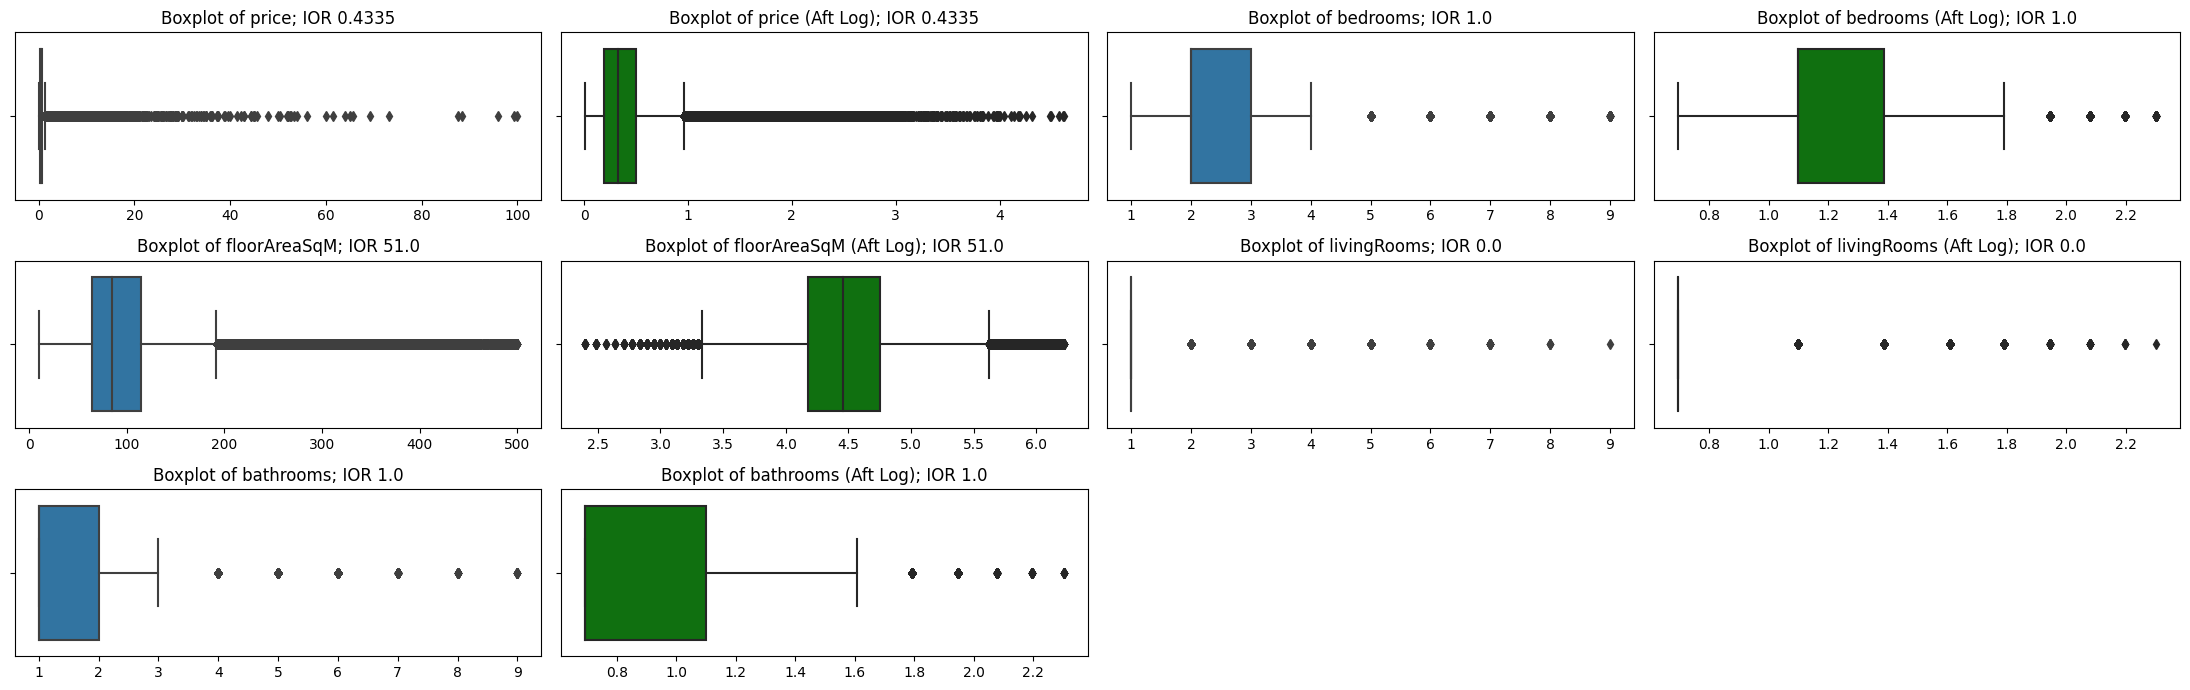

In [9]:
display(Markdown("Identifying outliers?"))

# Create a figure object – this is the blank canvas where we add subplots.
fig = plt.figure(figsize=(22, 7))

# Use GridSpec to define a 2x2 layout
gs = fig.add_gridspec(3, 4, width_ratios=[7, 7, 7, 7], height_ratios=[5, 5, 5])

# 1
ax1 = fig.add_subplot(gs[0, 0])
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
ax1.set_title("Boxplot of price; IOR {0}".format(IQR))
sns.boxplot(x=df['price'], ax=ax1)
ax1.set_xlabel(None)

# 1'
ax_1 = fig.add_subplot(gs[0, 1])
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
ax_1.set_title("Boxplot of price (Aft Log); IOR {0}".format(IQR))
sns.boxplot(x=np.log1p(df['price']), ax=ax_1, color="green")
ax_1.set_xlabel(None)

# 2
ax2 = fig.add_subplot(gs[1, 0])
Q1 = df['floorAreaSqM'].quantile(0.25)
Q3 = df['floorAreaSqM'].quantile(0.75)
IQR = Q3 - Q1
ax2.set_title("Boxplot of floorAreaSqM; IOR {0}".format(IQR))
sns.boxplot(x=df['floorAreaSqM'], ax=ax2)
ax2.set_xlabel(None)

# 2'
ax_2 = fig.add_subplot(gs[1, 1])
Q1 = df['floorAreaSqM'].quantile(0.25)
Q3 = df['floorAreaSqM'].quantile(0.75)
IQR = Q3 - Q1
ax_2.set_title("Boxplot of floorAreaSqM (Aft Log); IOR {0}".format(IQR))
sns.boxplot(x=np.log1p(df['floorAreaSqM']), ax=ax_2, color="green")
ax_2.set_xlabel(None)

# 3
ax3 = fig.add_subplot(gs[2, 0])
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
ax3.set_title("Boxplot of bathrooms; IOR {0}".format(IQR))
sns.boxplot(x=df['bathrooms'], ax=ax3)
ax3.set_xlabel(None)

# 3'
ax_3 = fig.add_subplot(gs[2, 1])
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
ax_3.set_title("Boxplot of bathrooms (Aft Log); IOR {0}".format(IQR))
sns.boxplot(x=np.log1p(df['bathrooms']), ax=ax_3, color="green")
ax_3.set_xlabel(None)

# 4
ax4 = fig.add_subplot(gs[0, 2])
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
ax4.set_title("Boxplot of bedrooms; IOR {0}".format(IQR))
sns.boxplot(x=df['bedrooms'], ax=ax4)
ax4.set_xlabel(None)

# 4'
ax_4 = fig.add_subplot(gs[0, 3])
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
ax_4.set_title("Boxplot of bedrooms (Aft Log); IOR {0}".format(IQR))
sns.boxplot(x=np.log1p(df['bedrooms']), ax=ax_4, color="green")
ax_4.set_xlabel(None)

# 5
ax5 = fig.add_subplot(gs[1, 2])
Q1 = df['livingRooms'].quantile(0.25)
Q3 = df['livingRooms'].quantile(0.75)
IQR = Q3 - Q1
ax5.set_title("Boxplot of livingRooms; IOR {0}".format(IQR))
sns.boxplot(x=df['livingRooms'], ax=ax5)
ax5.set_xlabel(None)

# 5
ax_5 = fig.add_subplot(gs[1, 3])
Q1 = df['livingRooms'].quantile(0.25)
Q3 = df['livingRooms'].quantile(0.75)
IQR = Q3 - Q1
ax_5.set_title("Boxplot of livingRooms (Aft Log); IOR {0}".format(IQR))
sns.boxplot(x=np.log1p(df['livingRooms']), ax=ax_5, color="green")
ax_5.set_xlabel(None)

# Show the entire figure just once
plt.tight_layout()
plt.show()

Identifying outliers?

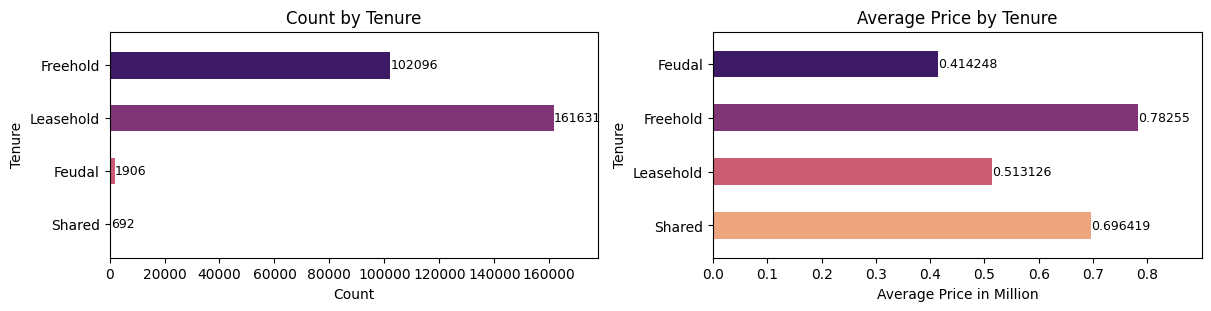

- Freehold and Tenure dominate property systems (~99% combined), while Feudal and Shared tenures are nearly obsolete—likely due to modern ownership preferences.

In [10]:
display(Markdown("Identifying outliers?"))

# Create 1 row, 2 columns of plots
g, ax = plt.subplots(1, 2, figsize=(12, 3), constrained_layout=True)
ax = ax.flatten()

# Plot 1 – Count of properties by tenure
sns.countplot(data=df, y='tenure', palette='magma', width=0.5, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, padding=0.1, fontsize=9)

# Set labels and title for Plot 1
ax[0].set_title("Count by Tenure", fontsize=12)
ax[0].set_xlabel("Count")
ax[0].set_ylabel("Tenure")
ax[0].margins(x=0.1, y=0.11)

# Plot 2 – Average price by tenure
grouped_df = df.groupby(by='tenure')['price'].mean().reset_index()
sns.barplot(data=grouped_df, y='tenure', x='price', palette='magma', width=0.5, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, padding=0.1, fontsize=9)

# Set labels and title for Plot 2
ax[1].set_title("Average Price by Tenure", fontsize=12)
ax[1].set_xlabel("Average Price in Million")
ax[1].set_ylabel("Tenure")
ax[1].margins(x=0.15, y=0.1)

# Final layout adjustment
plt.show()

display(Markdown("- Freehold and Tenure dominate property systems (~99% combined), while Feudal and Shared tenures are nearly obsolete—likely due to modern ownership preferences."))

Numerical attribute distribution?

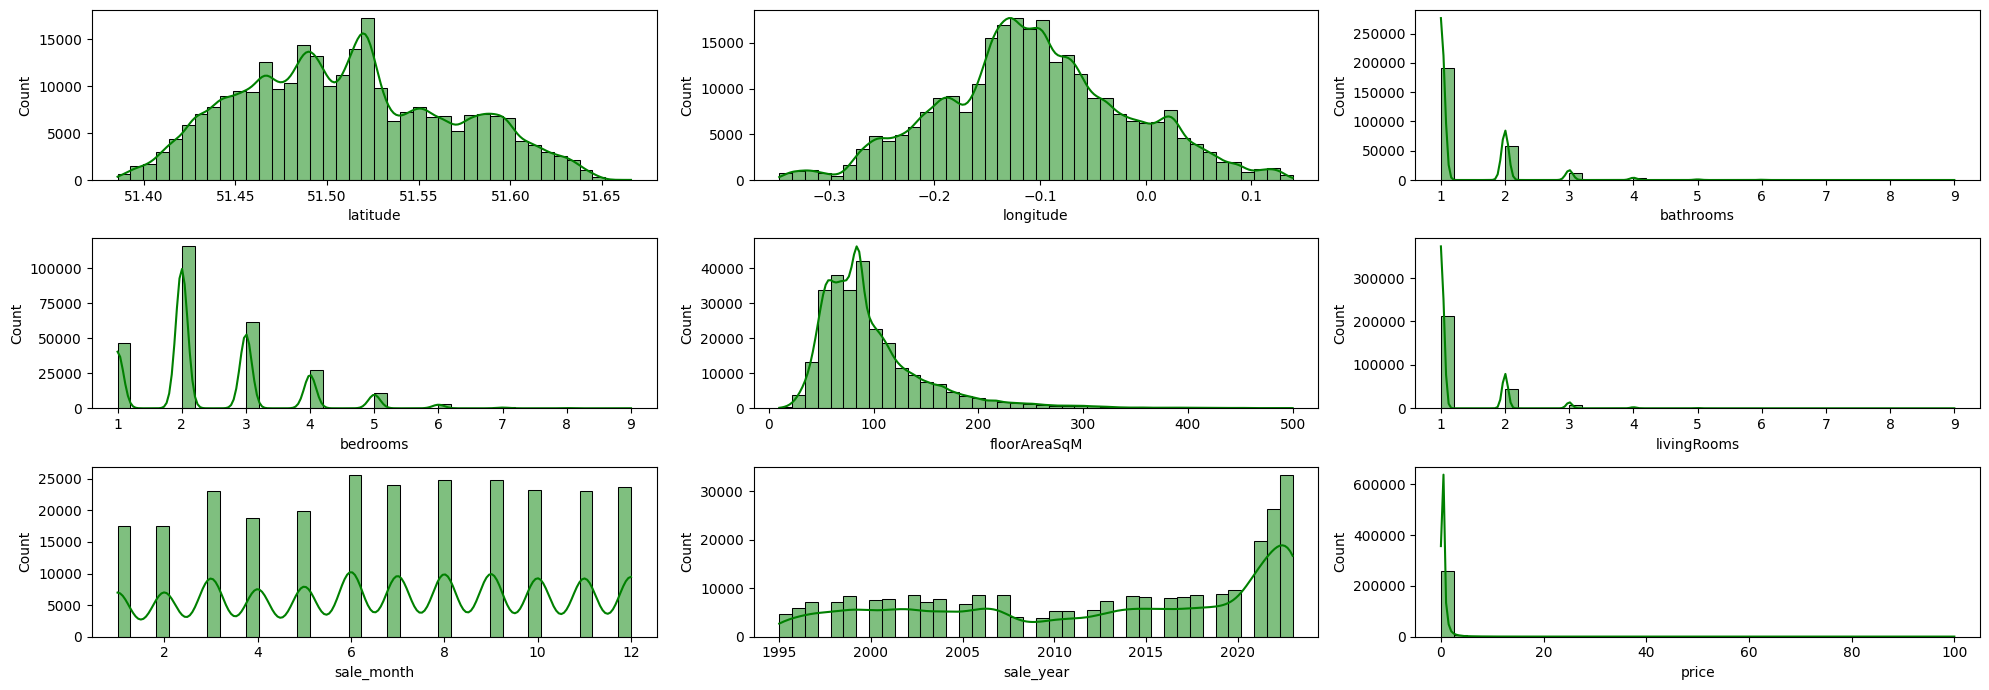


### Property Location
- Latitude (Sl.40–Sl.65): Most properties cluster around Sl.50–Sl.55 (peak count ~15,000). Suggests a "sweet spot" for housing demand or zoning in this band.
- Longitude (-0.3 to 0.1): Strong concentration near 0.0 (likely a central urban area).Sharp drop beyond ±0.1 → limited development in peripheral zones.

### Property Features
- Bedrooms: 2–3 bedrooms dominate (peak ~150K), typical for family homes. Fewer 1-bed or 4+ bed units (niche demand).
- Bathrooms: 1–2 bathrooms are most common (~125K), aligning with bedroom data.
- Living Rooms: Similar to bedrooms; 1–2 living rooms are standard.
- Floor Area (SqM): Most properties are <200 SqM (sharp decline beyond this). Very few >400 SqM (luxury/large estates).

### Sales Trends
- Sale Month: Peaks in mid-year months (6–8) → summer buying season. Dips in winter (months 2, 12) → holiday slowdown.
- Sale Year: Post-2010 surge (peak ~200K sales/year) → market growth. Pre-2005 activity was minimal (possible data gaps or low supply).

### Price 
- Price: Most properties priced <£0.4M (left-skewed). Few ultra-high-price outliers (~£1M+) → luxury segment.


In [11]:
display(Markdown("Numerical attribute distribution?"))

g, ax = plt.subplots(3, 3, figsize=(20, 7))
ax = ax.flatten()

num_features = ['latitude',	'longitude',	'bathrooms',	'bedrooms', 
                'floorAreaSqM',	'livingRooms', 'sale_month', 'sale_year', 'price']

for i, col in enumerate(df[num_features].columns):
    sns.histplot(data = df.dropna(subset = [col]), x = col, bins = 40, ax=ax[i], kde = True, color ='green')

plt.tight_layout()
plt.show()

display(Markdown("""
### Property Location
- Latitude (Sl.40–Sl.65): Most properties cluster around Sl.50–Sl.55 (peak count ~15,000). Suggests a "sweet spot" for housing demand or zoning in this band.
- Longitude (-0.3 to 0.1): Strong concentration near 0.0 (likely a central urban area).Sharp drop beyond ±0.1 → limited development in peripheral zones.

### Property Features
- Bedrooms: 2–3 bedrooms dominate (peak ~150K), typical for family homes. Fewer 1-bed or 4+ bed units (niche demand).
- Bathrooms: 1–2 bathrooms are most common (~125K), aligning with bedroom data.
- Living Rooms: Similar to bedrooms; 1–2 living rooms are standard.
- Floor Area (SqM): Most properties are <200 SqM (sharp decline beyond this). Very few >400 SqM (luxury/large estates).

### Sales Trends
- Sale Month: Peaks in mid-year months (6–8) → summer buying season. Dips in winter (months 2, 12) → holiday slowdown.
- Sale Year: Post-2010 surge (peak ~200K sales/year) → market growth. Pre-2005 activity was minimal (possible data gaps or low supply).

### Price 
- Price: Most properties priced <£0.4M (left-skewed). Few ultra-high-price outliers (~£1M+) → luxury segment.
"""))

Price distribution over numerical attributes?

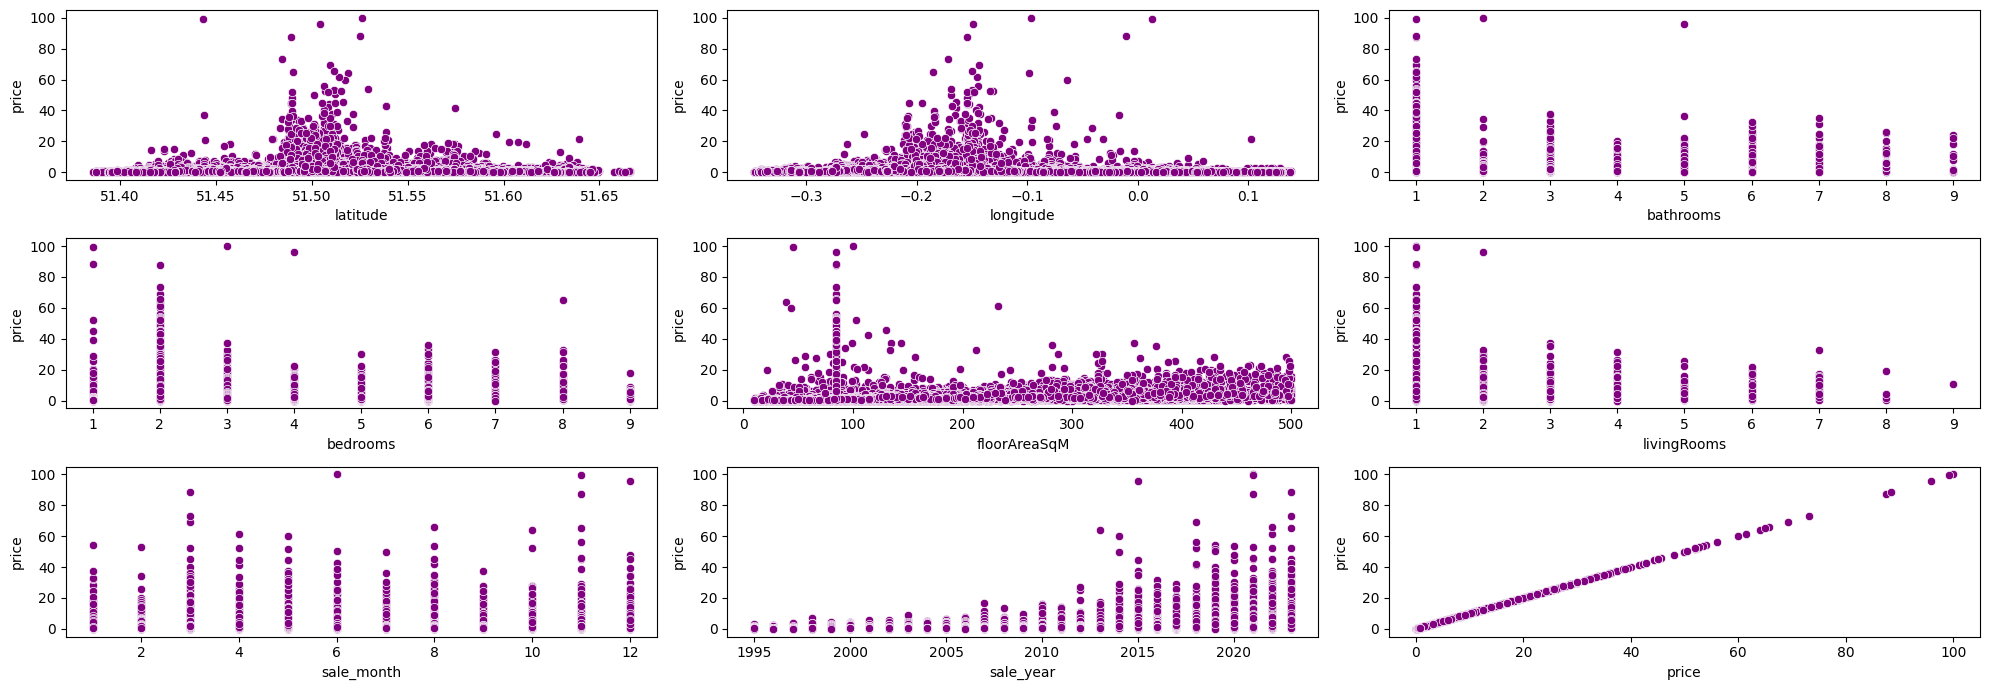


- 📍 Location (latitude & longitude): Prices are highly concentrated around central coordinates (suggests central London). Price drops as you move away.
- 🛁 Bathrooms/Bedrooms/LivingRooms: No clear linear pattern, but more rooms slightly increase price range. Some extreme outliers exist (e.g., 8+ rooms with low price).
- 📐 floorAreaSqM: Positive correlation – larger homes tend to be more expensive, but with many outliers.
- 📅 sale_year: Prices increased sharply after 2000, especially post-2010, showing a strong upward trend.
- 🗓️ sale_month: No strong seasonality visible – prices are spread fairly evenly across months.
- 📈 price vs price (diagonal): Diagonal plot confirms correct matrix setup; values match exactly.

In [12]:
display(Markdown("Price distribution over numerical attributes?"))

g, ax = plt.subplots(3, 3, figsize=(20, 7))

ax = ax.flatten()
for i, col in enumerate(df[num_features].columns):
    sns.scatterplot(data=df, x=col, y='price', ax = ax[i], color = "purple")

plt.tight_layout()
plt.show()

display(Markdown("""
- 📍 Location (latitude & longitude): Prices are highly concentrated around central coordinates (suggests central London). Price drops as you move away.
- 🛁 Bathrooms/Bedrooms/LivingRooms: No clear linear pattern, but more rooms slightly increase price range. Some extreme outliers exist (e.g., 8+ rooms with low price).
- 📐 floorAreaSqM: Positive correlation – larger homes tend to be more expensive, but with many outliers.
- 📅 sale_year: Prices increased sharply after 2000, especially post-2010, showing a strong upward trend.
- 🗓️ sale_month: No strong seasonality visible – prices are spread fairly evenly across months.
- 📈 price vs price (diagonal): Diagonal plot confirms correct matrix setup; values match exactly."""))

Correlation Matrix for numerical feauters

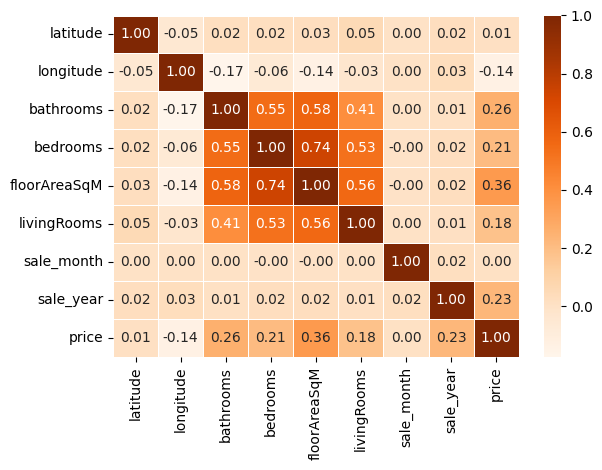


- 🛏️ Bedrooms ↔ FloorAreaSqM (0.74): Strongest positive correlation – larger homes usually have more bedrooms.
- 🛁 Bathrooms ↔ Bedrooms (0.55) & FloorAreaSqM (0.58): More bathrooms typically in bigger homes.
- 🛋️ LivingRooms also moderately correlated with Bedrooms (0.53) and FloorAreaSqM (0.56).
- 💰 Price is moderately correlated with:
    * floorAreaSqM (0.36)
    * bathrooms (0.26)
    * sale_year (0.23)
- 📍 Latitude & Longitude: Very low to no correlation with price, possibly due to central clustering.
- 🗓️ sale_month: No correlation with price; suggests little seasonal variation in prices.

In [13]:
display(Markdown("""Correlation Matrix for numerical feauters"""))

sns.heatmap(df[num_features].corr(),  cmap = 'Oranges', annot=True, linewidths=0.5, fmt='.2f')
plt.tight_layout()
plt.show()

display(Markdown("""
- 🛏️ Bedrooms ↔ FloorAreaSqM (0.74): Strongest positive correlation – larger homes usually have more bedrooms.
- 🛁 Bathrooms ↔ Bedrooms (0.55) & FloorAreaSqM (0.58): More bathrooms typically in bigger homes.
- 🛋️ LivingRooms also moderately correlated with Bedrooms (0.53) and FloorAreaSqM (0.56).
- 💰 Price is moderately correlated with:
    * floorAreaSqM (0.36)
    * bathrooms (0.26)
    * sale_year (0.23)
- 📍 Latitude & Longitude: Very low to no correlation with price, possibly due to central clustering.
- 🗓️ sale_month: No correlation with price; suggests little seasonal variation in prices."""))